In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn import preprocessing
#from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor

#from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ordinal = pd.read_csv('BaseOrdinal.csv')
ordinal.shape

(2580, 83)

In [3]:
ordinal = ordinal.drop(['Unnamed: 0', 'PID', 'Unnamed: 0.1'], axis=1)
ordinal.shape

(2580, 80)

In [4]:
X = ordinal.drop(['SalePrice'], axis=1)
y = ordinal.SalePrice

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.25)

In [6]:
len(X.columns)

79

In [7]:
CB = CatBoostRegressor(verbose=False)

In [8]:
CB.fit(X_train, Y_train)

In [9]:
CB.score(X_test, Y_test)

0.9408201081150661

In [10]:
cb_results_train = CB.predict(X_train)

In [11]:
cb_results_test = CB.predict(X_test)

In [12]:
X_train_cb = X_train.assign(CB = cb_results_train)
X_train_cb

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,CB
355,5.0,5.0,1.0,1.0,2.0,2.0,0.0,4.0,2.0,26.0,2.0,2.0,0.0,2.0,3.0,0.0,3.0,3.0,2.0,3.0,4.0,1.0,2.0,5.0,1.0,0.0,5.0,2.0,4.0,1.0,4.0,4.0,6.0,2.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,3.0,9.0,4.0,2036,150.000000,215245,7,5,1965,1965,0.0,1236.0,820.0,80.0,2136.0,2036,0,0,2.0,0.0,2,0,3,1,8,2,1965.0,2.0,513.0,0,0,0,0,0,0,0,367870.724898
1816,9.0,5.0,1.0,1.0,3.0,1.0,0.0,4.0,1.0,6.0,2.0,2.0,0.0,0.0,1.0,0.0,13.0,14.0,2.0,3.0,4.0,1.0,2.0,5.0,2.0,1.0,6.0,1.0,4.0,1.0,4.0,4.0,6.0,2.0,1.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,4.0,0.0,9.0,4.0,1717,80.000000,12400,5,6,1940,1950,0.0,602.0,0.0,299.0,901.0,1125,592,0,0.0,0.0,1,1,2,1,7,1,1940.0,1.0,410.0,0,0,0,0,113,0,0,188412.927497
2466,5.0,5.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,5.0,2.0,2.0,0.0,2.0,3.0,0.0,8.0,8.0,2.0,3.0,2.0,1.0,5.0,5.0,2.0,5.0,6.0,1.0,0.0,1.0,4.0,4.0,6.0,3.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,0.0,9.0,4.0,864,120.000000,9560,5,7,1972,1972,0.0,360.0,0.0,504.0,864.0,864,0,0,0.0,0.0,1,0,3,1,5,0,1972.0,1.0,288.0,0,0,0,0,0,0,0,124836.193523
162,10.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,18.0,2.0,2.0,0.0,5.0,1.0,0.0,6.0,6.0,1.0,2.0,4.0,2.0,2.0,5.0,3.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,5.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0,9.0,4.0,2225,88.000000,11134,8,5,1992,1993,180.0,1129.0,0.0,261.0,1390.0,1402,823,0,1.0,0.0,2,1,4,1,7,1,1992.0,3.0,713.0,198,30,0,0,0,0,0,290720.512147
182,2.0,5.0,1.0,1.0,0.0,3.0,0.0,1.0,0.0,25.0,2.0,2.0,4.0,5.0,1.0,0.0,6.0,6.0,2.0,2.0,4.0,1.0,2.0,5.0,2.0,2.0,3.0,1.0,2.0,1.0,4.0,2.0,2.0,5.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,11.0,1.0,9.0,4.0,2090,68.516053,5062,7,5,1984,1984,0.0,828.0,182.0,180.0,1190.0,1190,900,0,1.0,0.0,2,0,3,1,6,1,1984.0,2.0,577.0,219,0,0,0,0,0,0,209797.338760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,10.0,5.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,18.0,2.0,2.0,0.0,5.0,1.0,0.0,6.0,7.0,1.0,2.0,4.0,2.0,2.0,5.0,3.0,3.0,2.0,1.0,0.0,1.0,4.0,2.0,6.0,5.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0,9.0,4.0,2349,85.000000,13143,8,5,1993,1993,504.0,250.0,981.0,0.0,1231.0,1251,1098,0,1.0,0.0,2,1,4,1,9,1,1993.0,3.0,762.0,32,130,0,0,0,0,0,348747.052357
1923,11.0,6.0,1.0,0.0,3.0,3.0,0.0,4.0,1.0,20.0,2.0,2.0,0.0,5.0,1.0,0.0,8.0,8.0,2.0,3.0,4.0,0.0,5.0,1.0,2.0,6.0,6.0,1.0,2.0,1.0,0.0,4.0,6.0,3.0,5.0,3.0,5.0,5.0,0.0,3.0,4.0,1.0,5.0,0.0,9.0,4.0,1376,42.000000,7614,3,5,1905,1950,0.0,0.0,0.0,738.0,738.0,714,662,0,0.0,0.0,1,0,2,1,7,0,1930.0,1.0,216.0,0,0,104,0,225,0,0,96317.226344
1396,5.0,5.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,19.0,2.0,2.0,0.0,2.0,3.0,0.0,5.0,5.0,1.0,2.0,4.0,2.0,0.0,5.0,3.0,2.0,6.0,1.0,0.0,1.0,4.0,0.0,6.0,2.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,4.0,4.0,9.0,4.0,1822,79.000000,14122,8,5,2005,2006,240.0,28.0,0.0,1794.0,1822.0,1822,0,0,0.0,0.0,2,0,3,1,8,1,2005.0,3.0,678.0,0,119,0,0,0,0,0,267546.077673
2265,5.0,5.0,1.0,1.0,0.0,3.0,0.0,1.0,0.0,14.0,2.0,2.0,0.0,2.0,1.0,0.0,6.0,6.0,1.0,3.0,4.0,1.0,5.0,5.0,3.0,5.0,6.0,1.0,4.0,1.0,4.0,4.0,6.0,3.0,1.0,3.0,5.0,5.0,1.0,3.0,4.0,1.0,6.0,4.0,9.0,4.0,11

In [13]:
X_test_cb = X_test.assign(CB = cb_results_test)
X_test_cb

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,CB
1440,5.0,5.0,1.0,1.0,3.0,3.0,0.0,2.0,0.0,5.0,2.0,2.0,0.0,2.0,1.0,0.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,5.0,0.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,10.0,3.0,9.0,4.0,1500,63.000000,8487,7,5,2004,2004,210.0,20.0,0.0,1480.0,1500.0,1500,0,0,0.0,0.0,2,0,3,1,6,0,2004.0,2.0,570.0,192,36,0,0,0,0,0,200327.785960
747,2.0,2.0,1.0,2.0,3.0,3.0,0.0,4.0,0.0,24.0,2.0,2.0,4.0,5.0,1.0,0.0,8.0,8.0,1.0,3.0,4.0,2.0,2.0,5.0,3.0,2.0,6.0,1.0,2.0,1.0,4.0,4.0,6.0,3.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,5.0,3.0,9.0,4.0,1471,34.000000,3230,6,5,1999,1999,894.0,381.0,0.0,348.0,729.0,742,729,0,0.0,0.0,2,1,3,1,6,0,1999.0,2.0,440.0,0,24,0,0,0,0,0,158425.605763
737,5.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,15.0,2.0,2.0,0.0,2.0,1.0,0.0,8.0,8.0,1.0,3.0,4.0,1.0,5.0,5.0,3.0,0.0,6.0,1.0,0.0,1.0,4.0,4.0,6.0,3.0,1.0,2.0,5.0,5.0,2.0,3.0,2.0,1.0,9.0,3.0,9.0,4.0,1041,80.000000,9600,5,6,1959,1959,132.0,991.0,0.0,50.0,1041.0,1041,0,0,1.0,0.0,1,0,3,1,6,0,1959.0,1.0,270.0,224,88,0,0,0,0,0,143685.402332
270,5.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,14.0,2.0,2.0,0.0,2.0,1.0,0.0,6.0,7.0,2.0,3.0,4.0,1.0,5.0,5.0,1.0,0.0,6.0,1.0,4.0,1.0,4.0,4.0,6.0,3.0,1.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,1.0,9.0,4.0,816,76.000000,8314,5,7,1982,1982,0.0,546.0,0.0,270.0,816.0,816,0,0,0.0,0.0,1,0,2,1,5,0,1982.0,1.0,264.0,168,0,0,0,0,0,0,128176.751207
579,8.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,6.0,2.0,2.0,0.0,1.0,1.0,0.0,13.0,14.0,2.0,3.0,4.0,0.0,5.0,5.0,3.0,6.0,6.0,3.0,1.0,0.0,4.0,4.0,6.0,3.0,5.0,3.0,4.0,4.0,2.0,3.0,2.0,1.0,8.0,1.0,9.0,4.0,789,55.000000,10594,5,5,1926,1950,0.0,0.0,0.0,768.0,768.0,789,0,0,0.0,0.0,1,0,2,1,5,0,1926.0,1.0,200.0,0,0,112,0,0,0,0,99195.418080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2361,0.0,5.0,1.0,1.0,3.0,1.0,0.0,4.0,0.0,4.0,2.0,2.0,0.0,2.0,1.0,0.0,13.0,14.0,2.0,3.0,4.0,2.0,2.0,5.0,2.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,2.0,1.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,2.0,2.0,9.0,4.0,1291,68.516053,2887,6,5,1996,1997,0.0,1003.0,0.0,288.0,1291.0,1291,0,0,1.0,0.0,1,0,2,1,6,1,1996.0,2.0,431.0,307,0,0,0,0,0,0,180128.290676
344,14.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,22.0,1.0,2.0,0.0,6.0,1.0,0.0,6.0,6.0,1.0,3.0,4.0,2.0,2.0,5.0,0.0,2.0,5.0,1.0,0.0,1.0,4.0,4.0,6.0,3.0,5.0,3.0,5.0,5.0,2.0,3.0,2.0,1.0,8.0,0.0,9.0,4.0,810,72.000000,10820,5,7,1971,1972,153.0,535.0,159.0,88.0,782.0,810,0,0,1.0,0.0,1,0,2,1,4,0,1973.0,2.0,576.0,0,0,0,0,0,0,0,135270.388108
590,5.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,15.0,2.0,2.0,0.0,2.0,1.0,0.0,12.0,13.0,2.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,4.0,1.0,0.0,1.0,4.0,4.0,4.0,4.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,6.0,4.0,9.0,4.0,827,60.000000,7200,5,7,1955,2007,0.0,0.0,0.0,0.0,0.0,827,0,0,0.0,0.0,1,0,2,1,5,1,1967.0,1.0,392.0,0,0,0,0,0,0,0,108973.806288
915,5.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,7.0,2.0,2.0,0.0,2.0,1.0,0.0,14.0,15.0,2.0,3.0,4.0,1.0,5.0,2.0,0.0,0.0,6.0,1.0,4.0,1.0,4.0,2.0,6.0,2.0,1.0,3.0,5.0,5.0,2.0,3.0,2.0,1.0,8.0,1.0,9.0,4.0,2158,84.000000,12615,6,7,1950,2001,0

In [14]:
Y_train

355     375000
1816    194000
2466    128500
162     285000
182     207500
         ...  
1040    362500
1923     96900
1396    259000
2265    157900
1055    140000
Name: SalePrice, Length: 1935, dtype: int64

In [15]:
X_train_full = X_train_cb.assign(SalePrice = Y_train)
X_train_full

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,CB,SalePrice
355,5.0,5.0,1.0,1.0,2.0,2.0,0.0,4.0,2.0,26.0,2.0,2.0,0.0,2.0,3.0,0.0,3.0,3.0,2.0,3.0,4.0,1.0,2.0,5.0,1.0,0.0,5.0,2.0,4.0,1.0,4.0,4.0,6.0,2.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,3.0,9.0,4.0,2036,150.000000,215245,7,5,1965,1965,0.0,1236.0,820.0,80.0,2136.0,2036,0,0,2.0,0.0,2,0,3,1,8,2,1965.0,2.0,513.0,0,0,0,0,0,0,0,367870.724898,375000
1816,9.0,5.0,1.0,1.0,3.0,1.0,0.0,4.0,1.0,6.0,2.0,2.0,0.0,0.0,1.0,0.0,13.0,14.0,2.0,3.0,4.0,1.0,2.0,5.0,2.0,1.0,6.0,1.0,4.0,1.0,4.0,4.0,6.0,2.0,1.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,4.0,0.0,9.0,4.0,1717,80.000000,12400,5,6,1940,1950,0.0,602.0,0.0,299.0,901.0,1125,592,0,0.0,0.0,1,1,2,1,7,1,1940.0,1.0,410.0,0,0,0,0,113,0,0,188412.927497,194000
2466,5.0,5.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,5.0,2.0,2.0,0.0,2.0,3.0,0.0,8.0,8.0,2.0,3.0,2.0,1.0,5.0,5.0,2.0,5.0,6.0,1.0,0.0,1.0,4.0,4.0,6.0,3.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,0.0,9.0,4.0,864,120.000000,9560,5,7,1972,1972,0.0,360.0,0.0,504.0,864.0,864,0,0,0.0,0.0,1,0,3,1,5,0,1972.0,1.0,288.0,0,0,0,0,0,0,0,124836.193523,128500
162,10.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,18.0,2.0,2.0,0.0,5.0,1.0,0.0,6.0,6.0,1.0,2.0,4.0,2.0,2.0,5.0,3.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,5.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0,9.0,4.0,2225,88.000000,11134,8,5,1992,1993,180.0,1129.0,0.0,261.0,1390.0,1402,823,0,1.0,0.0,2,1,4,1,7,1,1992.0,3.0,713.0,198,30,0,0,0,0,0,290720.512147,285000
182,2.0,5.0,1.0,1.0,0.0,3.0,0.0,1.0,0.0,25.0,2.0,2.0,4.0,5.0,1.0,0.0,6.0,6.0,2.0,2.0,4.0,1.0,2.0,5.0,2.0,2.0,3.0,1.0,2.0,1.0,4.0,2.0,2.0,5.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,11.0,1.0,9.0,4.0,2090,68.516053,5062,7,5,1984,1984,0.0,828.0,182.0,180.0,1190.0,1190,900,0,1.0,0.0,2,0,3,1,6,1,1984.0,2.0,577.0,219,0,0,0,0,0,0,209797.338760,207500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,10.0,5.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,18.0,2.0,2.0,0.0,5.0,1.0,0.0,6.0,7.0,1.0,2.0,4.0,2.0,2.0,5.0,3.0,3.0,2.0,1.0,0.0,1.0,4.0,2.0,6.0,5.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0,9.0,4.0,2349,85.000000,13143,8,5,1993,1993,504.0,250.0,981.0,0.0,1231.0,1251,1098,0,1.0,0.0,2,1,4,1,9,1,1993.0,3.0,762.0,32,130,0,0,0,0,0,348747.052357,362500
1923,11.0,6.0,1.0,0.0,3.0,3.0,0.0,4.0,1.0,20.0,2.0,2.0,0.0,5.0,1.0,0.0,8.0,8.0,2.0,3.0,4.0,0.0,5.0,1.0,2.0,6.0,6.0,1.0,2.0,1.0,0.0,4.0,6.0,3.0,5.0,3.0,5.0,5.0,0.0,3.0,4.0,1.0,5.0,0.0,9.0,4.0,1376,42.000000,7614,3,5,1905,1950,0.0,0.0,0.0,738.0,738.0,714,662,0,0.0,0.0,1,0,2,1,7,0,1930.0,1.0,216.0,0,0,104,0,225,0,0,96317.226344,96900
1396,5.0,5.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,19.0,2.0,2.0,0.0,2.0,3.0,0.0,5.0,5.0,1.0,2.0,4.0,2.0,0.0,5.0,3.0,2.0,6.0,1.0,0.0,1.0,4.0,0.0,6.0,2.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,4.0,4.0,9.0,4.0,1822,79.000000,14122,8,5,2005,2006,240.0,28.0,0.0,1794.0,1822.0,1822,0,0,0.0,0.0,2,0,3,1,8,1,2005.0,3.0,678.0,0,119,0,0,0,0,0,267546.077673,259000
2265,5.0,5.0,1.0,1.0,0.0,3.0,0.0,1.0,0.0,14.0,2.0,2.0,0.0,2.0,1.0,0.0,6.0,6.0,1.0,3.0,4.0,1.0,5.0,5.0,3.0,5.0,6.0,1.0,4.0,1

In [16]:
X_test_full = X_test_cb.assign(SalePrice = Y_test)
X_test_full

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,CB,SalePrice
1440,5.0,5.0,1.0,1.0,3.0,3.0,0.0,2.0,0.0,5.0,2.0,2.0,0.0,2.0,1.0,0.0,12.0,13.0,1.0,2.0,4.0,2.0,2.0,5.0,0.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,10.0,3.0,9.0,4.0,1500,63.000000,8487,7,5,2004,2004,210.0,20.0,0.0,1480.0,1500.0,1500,0,0,0.0,0.0,2,0,3,1,6,0,2004.0,2.0,570.0,192,36,0,0,0,0,0,200327.785960,190000
747,2.0,2.0,1.0,2.0,3.0,3.0,0.0,4.0,0.0,24.0,2.0,2.0,4.0,5.0,1.0,0.0,8.0,8.0,1.0,3.0,4.0,2.0,2.0,5.0,3.0,2.0,6.0,1.0,2.0,1.0,4.0,4.0,6.0,3.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,5.0,3.0,9.0,4.0,1471,34.000000,3230,6,5,1999,1999,894.0,381.0,0.0,348.0,729.0,742,729,0,0.0,0.0,2,1,3,1,6,0,1999.0,2.0,440.0,0,24,0,0,0,0,0,158425.605763,172500
737,5.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,15.0,2.0,2.0,0.0,2.0,1.0,0.0,8.0,8.0,1.0,3.0,4.0,1.0,5.0,5.0,3.0,0.0,6.0,1.0,0.0,1.0,4.0,4.0,6.0,3.0,1.0,2.0,5.0,5.0,2.0,3.0,2.0,1.0,9.0,3.0,9.0,4.0,1041,80.000000,9600,5,6,1959,1959,132.0,991.0,0.0,50.0,1041.0,1041,0,0,1.0,0.0,1,0,3,1,6,0,1959.0,1.0,270.0,224,88,0,0,0,0,0,143685.402332,124500
270,5.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,14.0,2.0,2.0,0.0,2.0,1.0,0.0,6.0,7.0,2.0,3.0,4.0,1.0,5.0,5.0,1.0,0.0,6.0,1.0,4.0,1.0,4.0,4.0,6.0,3.0,1.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,1.0,9.0,4.0,816,76.000000,8314,5,7,1982,1982,0.0,546.0,0.0,270.0,816.0,816,0,0,0.0,0.0,1,0,2,1,5,0,1982.0,1.0,264.0,168,0,0,0,0,0,0,128176.751207,124500
579,8.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,6.0,2.0,2.0,0.0,1.0,1.0,0.0,13.0,14.0,2.0,3.0,4.0,0.0,5.0,5.0,3.0,6.0,6.0,3.0,1.0,0.0,4.0,4.0,6.0,3.0,5.0,3.0,4.0,4.0,2.0,3.0,2.0,1.0,8.0,1.0,9.0,4.0,789,55.000000,10594,5,5,1926,1950,0.0,0.0,0.0,768.0,768.0,789,0,0,0.0,0.0,1,0,2,1,5,0,1926.0,1.0,200.0,0,0,112,0,0,0,0,99195.418080,96500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2361,0.0,5.0,1.0,1.0,3.0,1.0,0.0,4.0,0.0,4.0,2.0,2.0,0.0,2.0,1.0,0.0,13.0,14.0,2.0,3.0,4.0,2.0,2.0,5.0,2.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,2.0,1.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,2.0,2.0,9.0,4.0,1291,68.516053,2887,6,5,1996,1997,0.0,1003.0,0.0,288.0,1291.0,1291,0,0,1.0,0.0,1,0,2,1,6,1,1996.0,2.0,431.0,307,0,0,0,0,0,0,180128.290676,173000
344,14.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,22.0,1.0,2.0,0.0,6.0,1.0,0.0,6.0,6.0,1.0,3.0,4.0,2.0,2.0,5.0,0.0,2.0,5.0,1.0,0.0,1.0,4.0,4.0,6.0,3.0,5.0,3.0,5.0,5.0,2.0,3.0,2.0,1.0,8.0,0.0,9.0,4.0,810,72.000000,10820,5,7,1971,1972,153.0,535.0,159.0,88.0,782.0,810,0,0,1.0,0.0,1,0,2,1,4,0,1973.0,2.0,576.0,0,0,0,0,0,0,0,135270.388108,130000
590,5.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,15.0,2.0,2.0,0.0,2.0,1.0,0.0,12.0,13.0,2.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,4.0,1.0,0.0,1.0,4.0,4.0,4.0,4.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,6.0,4.0,9.0,4.0,827,60.000000,7200,5,7,1955,2007,0.0,0.0,0.0,0.0,0.0,827,0,0,0.0,0.0,1,0,2,1,5,1,1967.0,1.0,392.0,0,0,0,0,0,0,0,108973.806288,107500
915,5.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,7.0,2.0,2.0,0.0,2.0,1.0,0.0,14.0,15.0,2.0,3.0,4.0,1.0,5.0,2.0,0.0,0.0,6.0,1.0,4.0,1.0,4.0,2.0,6.0,2.0,1.0,3.0,5.0,5.0

In [17]:
combo = pd.concat([X_train_full, X_test_full], axis=0)
combo

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,CB,SalePrice
355,5.0,5.0,1.0,1.0,2.0,2.0,0.0,4.0,2.0,26.0,2.0,2.0,0.0,2.0,3.0,0.0,3.0,3.0,2.0,3.0,4.0,1.0,2.0,5.0,1.0,0.0,5.0,2.0,4.0,1.0,4.0,4.0,6.0,2.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,3.0,9.0,4.0,2036,150.000000,215245,7,5,1965,1965,0.0,1236.0,820.0,80.0,2136.0,2036,0,0,2.0,0.0,2,0,3,1,8,2,1965.0,2.0,513.0,0,0,0,0,0,0,0,367870.724898,375000
1816,9.0,5.0,1.0,1.0,3.0,1.0,0.0,4.0,1.0,6.0,2.0,2.0,0.0,0.0,1.0,0.0,13.0,14.0,2.0,3.0,4.0,1.0,2.0,5.0,2.0,1.0,6.0,1.0,4.0,1.0,4.0,4.0,6.0,2.0,1.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,4.0,0.0,9.0,4.0,1717,80.000000,12400,5,6,1940,1950,0.0,602.0,0.0,299.0,901.0,1125,592,0,0.0,0.0,1,1,2,1,7,1,1940.0,1.0,410.0,0,0,0,0,113,0,0,188412.927497,194000
2466,5.0,5.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,5.0,2.0,2.0,0.0,2.0,3.0,0.0,8.0,8.0,2.0,3.0,2.0,1.0,5.0,5.0,2.0,5.0,6.0,1.0,0.0,1.0,4.0,4.0,6.0,3.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,0.0,9.0,4.0,864,120.000000,9560,5,7,1972,1972,0.0,360.0,0.0,504.0,864.0,864,0,0,0.0,0.0,1,0,3,1,5,0,1972.0,1.0,288.0,0,0,0,0,0,0,0,124836.193523,128500
162,10.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,18.0,2.0,2.0,0.0,5.0,1.0,0.0,6.0,6.0,1.0,2.0,4.0,2.0,2.0,5.0,3.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,5.0,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0,9.0,4.0,2225,88.000000,11134,8,5,1992,1993,180.0,1129.0,0.0,261.0,1390.0,1402,823,0,1.0,0.0,2,1,4,1,7,1,1992.0,3.0,713.0,198,30,0,0,0,0,0,290720.512147,285000
182,2.0,5.0,1.0,1.0,0.0,3.0,0.0,1.0,0.0,25.0,2.0,2.0,4.0,5.0,1.0,0.0,6.0,6.0,2.0,2.0,4.0,1.0,2.0,5.0,2.0,2.0,3.0,1.0,2.0,1.0,4.0,2.0,2.0,5.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,11.0,1.0,9.0,4.0,2090,68.516053,5062,7,5,1984,1984,0.0,828.0,182.0,180.0,1190.0,1190,900,0,1.0,0.0,2,0,3,1,6,1,1984.0,2.0,577.0,219,0,0,0,0,0,0,209797.338760,207500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2361,0.0,5.0,1.0,1.0,3.0,1.0,0.0,4.0,0.0,4.0,2.0,2.0,0.0,2.0,1.0,0.0,13.0,14.0,2.0,3.0,4.0,2.0,2.0,5.0,2.0,2.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,2.0,1.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,2.0,2.0,9.0,4.0,1291,68.516053,2887,6,5,1996,1997,0.0,1003.0,0.0,288.0,1291.0,1291,0,0,1.0,0.0,1,0,2,1,6,1,1996.0,2.0,431.0,307,0,0,0,0,0,0,180128.290676,173000
344,14.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,22.0,1.0,2.0,0.0,6.0,1.0,0.0,6.0,6.0,1.0,3.0,4.0,2.0,2.0,5.0,0.0,2.0,5.0,1.0,0.0,1.0,4.0,4.0,6.0,3.0,5.0,3.0,5.0,5.0,2.0,3.0,2.0,1.0,8.0,0.0,9.0,4.0,810,72.000000,10820,5,7,1971,1972,153.0,535.0,159.0,88.0,782.0,810,0,0,1.0,0.0,1,0,2,1,4,0,1973.0,2.0,576.0,0,0,0,0,0,0,0,135270.388108,130000
590,5.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,15.0,2.0,2.0,0.0,2.0,1.0,0.0,12.0,13.0,2.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,4.0,1.0,0.0,1.0,4.0,4.0,4.0,4.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,6.0,4.0,9.0,4.0,827,60.000000,7200,5,7,1955,2007,0.0,0.0,0.0,0.0,0.0,827,0,0,0.0,0.0,1,0,2,1,5,1,1967.0,1.0,392.0,0,0,0,0,0,0,0,108973.806288,107500
915,5.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,7.0,2.0,2.0,0.0,2.0,1.0,0.0,14.0,15.0,2.0,3.0,4.0,1.0,5.0,2.0,0.0,0.0,6.0,1.0,4.0,1.0,4.0,2.0,6.0,2.0,

In [18]:
X_gb = combo.drop(['SalePrice'], axis=1)
y_gb = combo.SalePrice

In [19]:
gbm = GradientBoostingRegressor()

In [20]:
scoring = {'r2': 'r2',
           'neg_mae': 'neg_mean_absolute_error',
          }

In [21]:
# Use cross-validation to evaluate model performance

def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_validate(model, X, y, scoring=scoring, 
                                  cv=cv, n_jobs=-1) 
    
    df = pd.DataFrame(scores)
    
    return df

In [22]:
dfs = evaluate_model(gbm, X_gb, y_gb)

In [23]:
gb_df = dfs[['test_r2', 'test_neg_mae']]
gb_df = gb_df.assign(MAE = gb_df['test_neg_mae'].abs())
gb_df = gb_df.rename(columns = {'test_r2':'CB+GB R2', 'MAE':'CB+GB MAE'})
gb_df

,CB+GB R2,test_neg_mae,CB+GB MAE
0,0.975566,-7607.091928,7607.091928
1,0.975500,-7442.491615,7442.491615
2,0.982832,-6467.254084,6467.254084
3,0.978255,-6992.068779,6992.068779
4,0.977246,-7225.885152,7225.885152
5,0.975007,-7046.294810,7046.294810
6,0.978391,-7394.953860,7394.953860
7,0.983057,-6718.466276,6718.466276
8,0.967552,-7359.399658,7359.399658
9,0.972091,-7521.849835,7521.849835


In [24]:
gb_df.to_csv('CB+GB.csv', index=False)

In [25]:
gb_df.describe()

,CB+GB R2,test_neg_mae,CB+GB MAE
count,15.000000,15.000000,15.000000
mean,0.976469,-7154.345619,7154.345619
std,0.004605,422.243359,422.243359
min,0.967552,-7849.241034,6462.107374
25%,0.974638,-7462.165953,6861.590906
50%,0.977246,-7225.885152,7225.885152
75%,0.979090,-6861.590906,7462.165953
max,0.983057,-6462.107374,7849.241034


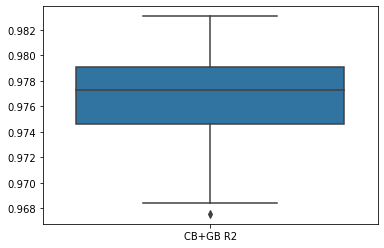

In [26]:
sns.boxplot(data=gb_df[['CB+GB R2']]);

In [27]:
X_trainGB, X_testGB, Y_trainGB, Y_testGB = train_test_split(X_gb,y_gb,test_size=0.25)
    
gbm.fit(X_trainGB, Y_trainGB)
y_pred = gbm.predict(X_testGB)

GB_Score = r2_score(Y_testGB, y_pred)
GB_Score

0.9723638021230923

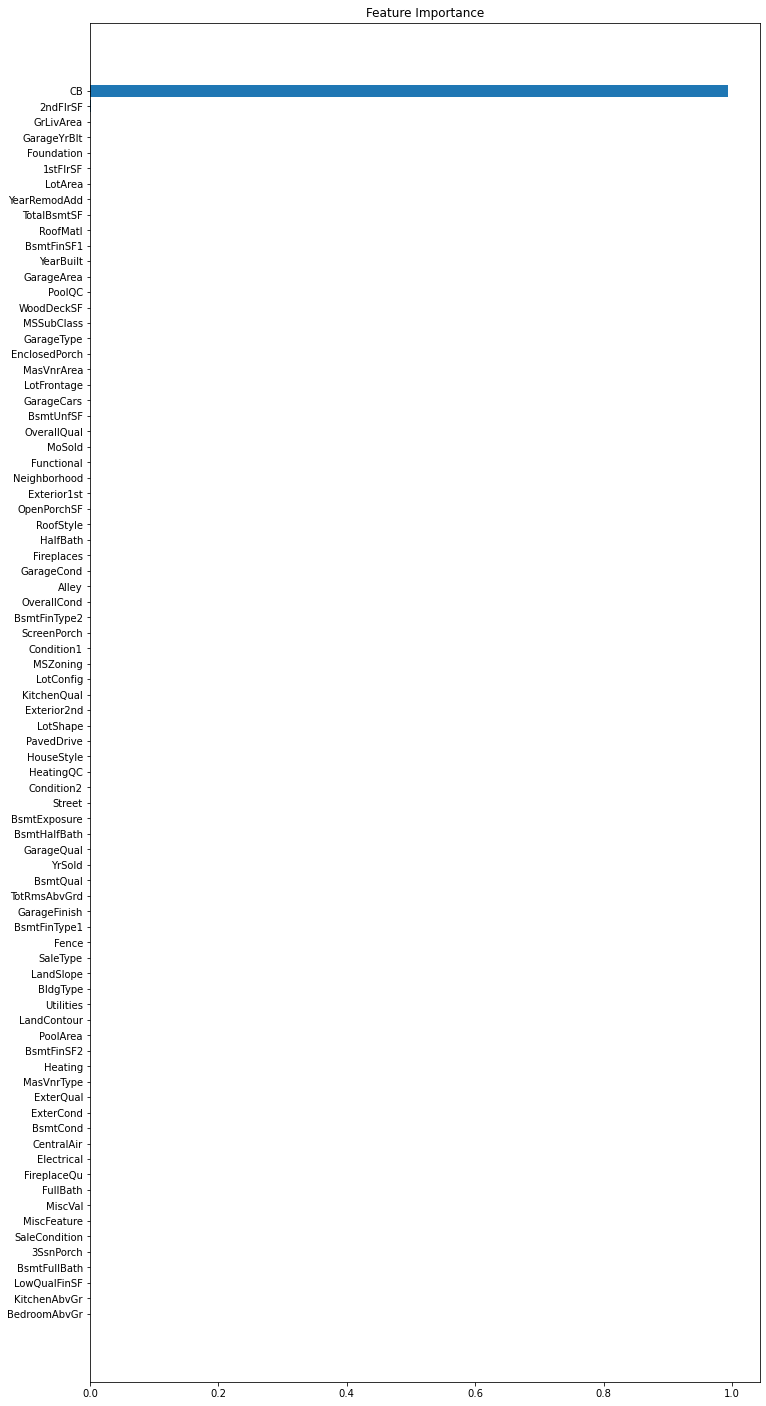

In [28]:
feature_importance = gbm.feature_importances_
sorted_idx = np.argsort(feature_importance)

fig = plt.figure(figsize=(12, 25))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_testGB.columns)[sorted_idx])
plt.title('Feature Importance');

In [29]:
X_cols = combo.drop(['SalePrice'], axis=1).columns
sorted_importance = sorted(zip(X_cols, gbm.feature_importances_), key=lambda t:t[1], reverse=True)
sorted_importance

[('CB', 0.9929323854023796),
 ('2ndFlrSF', 0.001741130772488136),
 ('GrLivArea', 0.0005418299135040929),
 ('GarageYrBlt', 0.00045020115194046114),
 ('Foundation', 0.00036371426090081),
 ('1stFlrSF', 0.0003600677593113345),
 ('LotArea', 0.00032619172092999895),
 ('YearRemodAdd', 0.000277166148953967),
 ('TotalBsmtSF', 0.00025082611834273817),
 ('RoofMatl', 0.00023180476508185432),
 ('BsmtFinSF1', 0.0002267099555394853),
 ('YearBuilt', 0.00020621940265262045),
 ('GarageArea', 0.0001865727002707824),
 ('PoolQC', 0.00018332659258672151),
 ('WoodDeckSF', 0.00015640670739768838),
 ('MSSubClass', 0.00013152128300026827),
 ('GarageType', 0.00012816358015840142),
 ('EnclosedPorch', 0.00011918015043821723),
 ('MasVnrArea', 0.00011284031303680248),
 ('LotFrontage', 0.00010057487442460911),
 ('GarageCars', 9.060697193708144e-05),
 ('BsmtUnfSF', 8.220127030670248e-05),
 ('OverallQual', 7.802060742147358e-05),
 ('MoSold', 7.499374292006064e-05),
 ('Functional', 6.283221676506718e-05),
 ('Neighborhoo

In [30]:
gbm.predict(X_gb)

array([347237.19234735, 188385.98340329, 125103.77304604, ...,
       106981.9664795 , 231491.10970514, 142419.96567153])